<a href="https://colab.research.google.com/github/brenoakihiromorimoto/portf-lio/blob/main/STONE%20DATA%20CHALLENGE%202022%20-%20Breno%20Akihiro%20Morimoto/c%C3%B3digos_e_scripts/Stone_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto
## Descrição do case 
* A Stone tem como objetivo ajudar o empreendedor brasileiro a vender, gerir e crescer seu negócio através dos nossos produtos e serviços que vão desde a maquininha de cartão de crédito à sistemas ERP para gestão. 
* Um dos produtos que oferecemos aos nossos clientes é o crédito, voltado para facilitar a vida do lojista e impulsionar o crescimento do seu negócio. 
* A Stone trabalha desde 2019 para construir um produto sólido e maduro. 

* Mesmo no momento mais intenso da pandemia provocada 
pela COVID-19, em 3 anos, já liberamos mais de 190 mil linhas de crédito, que somam mais de 3,4 bilhões de reais desembolsados para apoiar nossos clientes a crescer e manter seus negócios. 
* Nosso produto é diferenciado: os clientes pagam seus empréstimos através de um percentual de retenção aplicado sobre as transações realizadas pela maquininha de cartão Stone. 
* Desta forma, conseguimos promover um pagamento sustentável do empréstimo que acompanha as variações de fluxo de caixa do lojista, que não precisa se comprometer com um valor fixo que possa pesar em um mês de baixo movimento em seu negócio. 
* Um cliente pode ter mais de um contrato de empréstimo simultâneo, desde que o contrato anterior esteja em dia.
* Durante a pandemia, naturalmente tivemos um aumento de clientes inadimplentes, ou seja, com problemas no pagamento de seus contratos e, consequentemente, sentimos a 
necessidade de evoluir nossas ações de comunicação e acionamento para recuperação dos saldos devedores que alguns clientes passaram a deixar em aberto.
* Dentro desta evolução, uma das ações tomadas internamente foi refinar nossas estratégias de comunicação com os clientes, visando recuperar clientes que apresentavam 
problemas no ritmo de pagamento, e claro, sempre usando dados para melhor guiar nossas 
decisões! 
* Nesta edição do Stone Data Challenge, queremos dividir com você um dos problemas reais que nosso negócio enfrentou:
## Qual é a curva ideal de vezes que acionamos um cliente?
* Dado o problema apresentado, queremos que você nos conte qual a sua abordagem 
para analisar os dados disponibilizados a fim de entender e explorar **a curva de engajamento 
x quantidade de acionamentos** e nos traga insights sobre a efetividade destas ações em 
termos de pagamento.
* Quando um cliente começa a apresentar dificuldade na liquidação de seus contratos, ele passa a ser elegível para ser acionado por nossa régua de comunicação com intuito de 
estimular a retomada do ritmo saudável de pagamento de acordo com o perfil e o momento de 
cada cliente.

# Planejamento e reflexão sobre o problema.
## Problema principal: qual é a curva ideal de quantidade de acionamento X engajamento?
* O que seria considerado acionamento nesse caso e por quê?
  * Acionamento é somente a quantidade de campanhas únicas feitas por dia.
* O que seria considerado engajamento nesse caso e por quê?
  * O engajamento é o grau de proximidade entre o cliente e a empresa. Nesse caso da Stone, o impacto da solução precisa gerar insights para o cliente voltar a pagar as taxas de empréstimo, portanto a variável de engajamento será baseada se o cliente voltou a pagar as taxas. 
  
## Tarefas:
* Importar bibliotecas.
* Detectar encoding dos datasets.
* Quais são os datasets que deverão ser usados para encontrar o engajamento e a quantidade de acionamentos?
  * Portfolio_geral
  * Portfolio_comunicados
* Analisar valores duplicados, nulos, mínimo, máximos, únicos, entre outros.
* Limpeza dos dados
* Agrupar o portfolio_comunicados pelo id.
* Combinar os datasets.



# Importar Bibliotecas

In [1]:
!pip install lifelines

In [2]:
# Importar bibliotecas de manipulação e visualização de dados.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importar bibliotecas de teste de hipótese
from scipy.stats import shapiro, mannwhitneyu, ttest_ind, levene

# Importar biblioteca de detecção de encoding dos arquivos.
import chardet

# Importar biblioteca de modelo de sobrevivência.
from lifelines import KaplanMeierFitter



# Baixar os datasets

* Importante deixar os datasets em um drive por meio do compartilhamento de link público, e por que é necessário fazer isso?
  * Este notebook será acessível para todos testarem.
  * Os datasets ocupam mais de 1GB de memória, o que inviabiliza colocar no github.
* Dado esse cenário, foi importante importar a biblioteca **gdown** com a finalidade de fazer download de grandes arquivos de forma pública.

In [3]:
# Baixar todos os datasets do drive para ficarem públicos.
!gdown "1p3pd_hZ-SmWHH6X2y8b3y_k2lHwwSbL9"
!gdown "1h6N3QJEdJbPFrc7SCOu4PY58u8t6ylMA"
!gdown "1mzAt37PGzInUBs5_O7k8cDoP45V9WeAy"
!gdown "1wl-wTCsAtZwwW_iXsYJpK5YCVIKtazJe"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1p3pd_hZ-SmWHH6X2y8b3y_k2lHwwSbL9 

Downloading...
From: https://drive.google.com/uc?id=1h6N3QJEdJbPFrc7SCOu4PY58u8t6ylMA
To: /content/portfolio_comunicados.csv
100% 41.3M/41.3M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mzAt37PGzInUBs5_O7k8cDoP45V9WeAy
To: /content/portfolio_geral.csv
100% 2.04G/2.04G [00:16<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wl-wTCsAtZwwW_iXsYJpK5YCVIKtazJe
To: /content/portfolio_tpv.csv
100% 264M/264M [00:01<00:00, 136MB/s]


# Função

In [4]:
def hypothesis_test(group_A, group_B):
  stats_group_a, p_group_a = shapiro(group_A)
  stats_group_b, p_group_b = shapiro(group_B)
  print('Teste de Shapiro-Wilk: valor-p do grupo A: %.3f, valor-p do Grupo B: %.3f.' % (p_group_a, p_group_b))
  if p_group_a>=0.05 and p_group_b>=0.05:
    stats_levene, p_levene = levene(group_A,
                     group_B)
    print('O Teste de Shapiro-Wilk demonstrou que os grupos têm distribuição normal dos dados.')
    print('Teste de Levene: stats: %.3f, valor-p: %.3f.' % (stats_levene, p_levene))
    if p_levene>=0.05:
      stats_ttest, p_ttest = ttest_ind(group_A,
                          group_B, equal_var=True)
      print(f"O teste de Levene demonstrou que a variância é igual nos dois grupos: p-valor de %.3f." % (p_levene))

      print('Teste-t independente: stats: %.3f, valor-p: %.3f.' % (stats_ttest, p_ttest))
    elif p_levene<0.05:
      stats_ttest, p_ttest = ttest_ind(group_A,
                          group_B, equal_var=False)
      
      print(f"O teste de Levene demonstrou que a variância é significantemente diferente nos dois grupos: p-valor de %.3f." % (p_levene))
      if p_ttest>=0.05:
        print(f"O teste-t independente demonstrou diferença significativa das médias dos dois grupos: p-valor de %.3f." % (p_ttest))
      elif p_ttest<0.05:
        print(f"O teste-t independente não demonstrou diferença significativa das médias dos dois grupos: p-valor de %.3f." % (p_ttest))
  elif p_group_a<0.05 or p_group_b<0.05:
    stats_mann, p_mann = mannwhitneyu(group_A, group_B)
    print('O Teste de Shapiro-Wilk demonstrou que, no mínimo, algum dos dois grupos não tem distribuição normal dos dados.')
    print('Teste de Mann-Whitney-U: stats: %.3f, valor-p: %.3f.' % (stats_mann, p_mann))
    if p_mann>=0.05:
      print("O teste Mann-Whitney-U demonstrou que a distribuição dos grupos são iguais: p-valor de %.3f." % (p_mann))
    elif p_mann<0.05:
      print("O teste Mann-Whitney-U demonstrou que as medianas dos dois grupos não são iguais: p-valor de %.3f." % (p_mann))


# Detectar Encoding dos Datasets

In [5]:
nome_datasets = ["/content/portfolio_clientes.csv",
                 "/content/portfolio_comunicados.csv",
                 "/content/portfolio_geral.csv",
                 "/content/portfolio_tpv.csv"]
for dataset in nome_datasets:
  with open(dataset, 'rb') as rawdata:
      result = chardet.detect(rawdata.read(1000000))
      print(rawdata, result)

<_io.BufferedReader name='/content/portfolio_clientes.csv'> {'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
<_io.BufferedReader name='/content/portfolio_comunicados.csv'> {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
<_io.BufferedReader name='/content/portfolio_geral.csv'> {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
<_io.BufferedReader name='/content/portfolio_tpv.csv'> {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


* Apliquei o algoritmo **chardet** com a função **detect()** para descobrir o **encoding** de cada dataset, porque se o encoding for diferente do padrão, que é o **utf-8**, demorará muito tempo para descobrir o encoding manualmente.
* Sugestão do **chardet** baseada na probabilidade de ser um determinado encoding para abrir os seguintes datasets.
  * portfolio_clientes.csv: 
    * encoding: "utf-8", confiança: 99%.
  * portfolio_comunicados.csv: 
    * encoding: "ascii", confiança: 100%.
  * portfolio_geral.csv: 
    * encoding: "ascii", confiança: 100%.
  * portfolio_tpv.csv: 
    * encoding: "ascii", confiança: 100%.

# Abrir os datasets

In [6]:
df_portfolio_clientes = pd.read_csv("/content/portfolio_clientes.csv", encoding="utf-8", engine="python", sep=",")
df_portfolio_comunicados = pd.read_csv("/content/portfolio_comunicados.csv", encoding="ascii", engine="python", sep=",")
df_portfolio_geral = pd.read_csv("/content/portfolio_geral.csv", encoding="ascii", engine="python", sep=",")
df_portfolio_tpv = pd.read_csv("/content/portfolio_tpv.csv", encoding="ascii", engine="python", sep=",")

* Apliquei a função **read_csv()** para abrir os datasets originais e o encoding de cada um foi escolhido a partir da detecção de encoding. Por quê?
  * Porque descobrir o encoding por tentativa e erro é um método menos eficiente que descobrir isso a partir de algoritmo.
* As variáveis criadas foram: 
  * df_portfolio_clientes é igual a portfolio_clientes.csv.
  * df_portfolio_comunicados é igual a portfolio_comunicados.csv.
  * df_portfolio_geral é igual a portfolio_geral.csv.
  * df_portfolio_tpv é igual a portfolio_tpv.csv.

# Analisar os valores nulos

*	Irei analisar no momento apenas dois datasets: 
  * o	df_portfolio_geral
  * o	df_portfolio_comunicados 
* Por quê?
* Porque os dados necessários para responder o objetivo principal estão nesses dois datasets.


In [7]:
pd.set_option('display.max_columns', None)
df_portfolio_geral.head(3)

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao
0,356c02706c8e74b15004bb5964ade6bb,2022-03-01,2020-06,b0871d4e0d72afd1d44381e5b2453cb2,Settled,2020-06-24,2020-06-29,2020-12-24,2021-12-24,10.26,22686.57,0.0,0.10788,0.00345,0.24000,0.0,163.00,0.55,0.0,0,0,0
1,1eb0e13f83f336146227ccc9efb08c47,2022-03-01,2020-07,938513461b4a4fcd2bf99ffd8f12b9be,Settled,2020-07-26,2020-07-28,2021-10-26,2022-10-26,25.65,16074.00,0.0,0.04788,0.00157,0.08400,0.0,46.87,0.00,0.0,0,0,0
2,8b03675f597974ca96f06648e96af6d4,2022-03-01,2020-08,4303bd71ee3fe80aba4efc8dbd6c7d70,Settled,2020-08-13,2020-08-17,2022-02-13,2023-02-13,30.78,17100.00,0.0,0.05388,0.00176,0.08076,0.0,45.57,0.00,0.0,0,0,0


* Apliquei a função **set_option('display.max_columns', None)** para não esconder as colunas quando aplicar a função **head()**, porque, em um primeiro contato, é importante ter uma ideia dos valores em todas as colunas.

In [8]:
df_portfolio_geral.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061006 entries, 0 to 8061005
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   contrato_id                 8061006 non-null  object 
 1   dt_ref_portfolio            8061006 non-null  object 
 2   safra                       8061006 non-null  object 
 3   nr_documento                8061006 non-null  object 
 4   status_contrato             8061006 non-null  object 
 5   dt_contrato                 8061006 non-null  object 
 6   dt_desembolso               8061006 non-null  object 
 7   dt_vencimento               8061006 non-null  object 
 8   dt_wo                       8061006 non-null  object 
 9   prazo                       8061006 non-null  float64
 10  vlr_desembolsado            8061006 non-null  float64
 11  vlr_tarifa                  8061006 non-null  float64
 12  juros_mes                   8061006 non-null  float64
 1

* Apliquei a função **info(null_counts=True)** para verificar valores nulos no df_portfolio_geral.
* O df_portfolio_geral não apresenta valores nulos.
* O df_portfolio_geral não apresenta variáveis do tipo datetime, mesmo apresentando datas em algumas colunas:
 * dt_ref_portfolio
 * safra
 * dt_contrato
 * dt_desembolso
 * dt_vencimento
 * dt_wo

In [9]:
df_portfolio_comunicados.head(3)

,contrato_id,dt_ref_portfolio,data_acao,tipo_acao,acao,status
0,0d823ddff1839eb938dccc68586ae365,2021-01-16,2021-01-18,HSM,campanhaobservacao,LIDO
1,c2f8a21671dbaeaa4157e03682c639e1,2021-05-22,2021-05-24,HSM,campanhaobservacao,ENTREGUE
2,e19a222c233d46ff4984489c13aa1b98,2020-09-15,2020-09-15,HSM,campanhaobservacao,NAO ENTREGUE


* Apliquei a função **head()** para ter um primeiro contato com df_portfolio_comunicados . 

In [10]:
df_portfolio_comunicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403740 entries, 0 to 403739
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   contrato_id       403740 non-null  object
 1   dt_ref_portfolio  403740 non-null  object
 2   data_acao         403740 non-null  object
 3   tipo_acao         403740 non-null  object
 4   acao              403740 non-null  object
 5   status            403740 non-null  object
dtypes: object(6)
memory usage: 18.5+ MB


* Apliquei a função **info()** para verificar valores nulos no df_portfolio_comunicados. 
* O df_portfolio_comunicados não apresenta valores nulos.
* O df_portfolio_comunicados não apresentam variáveis do tipo datetime, mesmo apresentando datas em algumas colunas:
 * dt_ref_portfolio
 * data_acao
 

# Analisar os valores duplicados

In [11]:
print("O portfolio geral sem valores duplicados:", df_portfolio_geral.drop_duplicates().shape)
print("O portfolio geral com valores duplicados:", df_portfolio_geral.shape)

O portfolio geral sem valores duplicados: (8061006, 22)
O portfolio geral com valores duplicados: (8061006, 22)


* Usei duas funções para saber se o número de linhas é igual no dataset **df_portfolio_geral** sem linhas duplicadas. Primeiro usei a função **drop_duplicated()** para remover as linhas duplicadas e depois apliquei a função **shape** para mostrar o número de linhas.
  * Foram 8061006 linhas com a função **drop_duplicated()**.
  * Foram 8061006 linhas sem a função **drop_duplicated()**.
* Isso significa que não há linhas duplicadas.

In [12]:
print("O portfolio de comunicados sem valores duplicados:", df_portfolio_comunicados.drop_duplicates().shape)
print("O portfolio de comunicados com valores duplicados:", df_portfolio_comunicados.shape)

O portfolio de comunicados sem valores duplicados: (403740, 6)
O portfolio de comunicados com valores duplicados: (403740, 6)


* O número de linhas é igual no dataset **df_portfolio_comunicados** com a função **drop_duplicated()**. Isso significa que não há linhas duplicadas.
  * O portfolio de comunicados sem **drop_duplicated()**: 403740.
  * O portfolio de comunicados com **drop_duplicated()**: 403740.

# Analisar valores negativos e tipo de dados

In [13]:
df_portfolio_geral.describe(percentiles=[.01, .25, .50, .75, .99]).round(2)

,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao
count,8061006.00,8061006.00,8061006.00,8061006.00,8061006.0,8061006.00,8061006.00,8061006.00,8061006.00,8061006.00,8061006.00,8061006.00,8061006.00
mean,25.33,33879.33,27.43,0.06,0.0,0.20,62.41,104.41,21129.47,14925.37,15.71,42.33,0.56
std,6.21,41763.06,116.48,0.02,0.0,0.23,387.53,119.98,37265.85,27326.45,54.40,100.50,0.50
min,10.26,171.02,0.00,0.01,0.0,0.01,-44786.73,0.57,-44613.37,0.00,0.00,0.00,0.00
1%,10.26,1710.00,0.00,0.03,0.0,0.03,0.00,5.63,-0.02,0.00,0.00,0.00,0.00
25%,25.65,8741.52,0.00,0.05,0.0,0.10,0.00,30.58,0.31,0.00,0.00,0.00,0.00
50%,25.65,19165.68,0.00,0.06,0.0,0.15,0.00,63.93,8076.45,4873.26,0.00,1.00,1.00
75%,27.36,41195.61,0.00,0.07,0.0,0.20,19.29,128.12,24547.00,17029.46,2.00,16.00,1.00
99%,35.91,216718.56,592.19,0.11,0.0,1.20,993.22,613.83,181781.95,138311.23,284.00,476.00,1.00
max,35.91,400225.50,1710.00,0.11,0.0,1.20,210216.25,1134.03,750102.75,401338.69,791.00,833.00,1.00


* Apliquei a função **describe()** para sumarizar os mínimos e máximos no df_portfolio_geral. Por quê?
  * Porque é importante compreender se o valor negativo é um erro de digitação ou de sistema, ou significa algo para o negócio.
* Os valores mínimos do vlr_pgto_realizado e vlr_saldo_devedor são negativos. O que isso significa?
  * Para o vlr_pgto_realizado, pode significar estorno da compra, ou *chargeback*.
  * **Para o vlr_saldo_devedor**, provavelmente, quando houve a transação pela máquina no dia do registro, o valor do pagamento realizado foi efetuado sem necessidade, o que explica o valor negativo.
  * É melhor analisar de forma mais aprofundada o vlr_saldo_devedor.
  * Os tipos de dados do portfólio geral são, em sua maioria, variáveis numéricas. E o portfólio de comunicados?

In [14]:
df_portfolio_comunicados.describe(percentiles=[.01, .25, .50, .75, .99]).round(2)

,contrato_id,dt_ref_portfolio,data_acao,tipo_acao,acao,status
count,403740,403740,403740,403740,403740,403740
unique,12202,830,594,2,5,4
top,d9e21ac12696c51e4f68cbd1dd19560e,2021-04-03,2021-04-05,HSM,campanhaobservacao,NAO ENTREGUE
freq,186,2076,3026,201870,213334,191207


* Apliquei a função **describe()** para sumarizar os dados do **df_portfolio_comunicados**.
* O **df_portfolio_comunicados** apresenta 4 variáveis categóricas de 6 colunas.
* A variável **status** apresenta a categoria **"NAO ENTREGUE"** como a mais frequente do dataset **df_portfolio_comunicados**:
  * Frequência do **status**: 191207.
* A variável **ação** apresenta a categoria  **campanhaobservacao** foi  a mais frequente:
  * Frequência da **campanhaobservacao**: 213334.


## df_portfolio_geral: análise da variável valor do saldo devedor.

In [15]:
df_portfolio_geral[df_portfolio_geral["vlr_saldo_devedor"]<=0]["vlr_pgto_realizado"].value_counts()\
/df_portfolio_geral[df_portfolio_geral["vlr_saldo_devedor"]<=0]["vlr_pgto_realizado"].value_counts().sum()*100

 0.00        99.617588
 5130.00      0.000534
 42750.00     0.000297
 3420.00      0.000297
 17.07        0.000297
               ...    
 1177.59      0.000059
 105.88       0.000059
-16.23        0.000059
 10.96        0.000059
 15226.28     0.000059
Name: vlr_pgto_realizado, Length: 5759, dtype: float64

* Apliquei um filtro de vlr_saldo_devedor<=0 para compreender como funciona o vlr_pgto_realizado quando o cliente não deve dinheiro.
* Além disso, apliquei o **value_counts()** para saber quais são os valores predominantes para o **vlr_pgto_realizado**.
* Quando o valor saldo devedor está igual ou menor que 0, o valor do pagamento realizado foi 0 em 99,61% das vezes. Isso significa que 0,39% das vezes houve um pagamento realizado sem necessidade.

* **Hipótese**: existe diferença entre o pagamento realizado com transações feitas no dia do registro (flag_transacao) para o valor do saldo devedor negativo ou igual a 0.

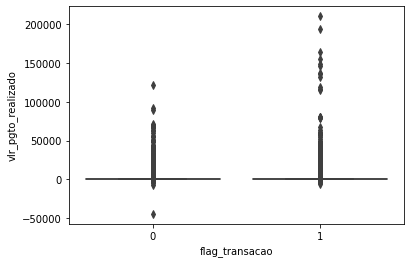

In [16]:
sns.boxplot(data=df_portfolio_geral[df_portfolio_geral["vlr_saldo_devedor"]<=0], 
            x="flag_transacao",
            y="vlr_pgto_realizado")

* Apliquei a função **boxplot()** para fazer uma análise visual entre os dois grupos de acordo com a flag_transacao.
* As medianas dos dois grupos estão próximas de 0 com **muitos outliers**. 
* Será necessário usar um teste de hipótese baseado em ranking, ou não-paramétrico, como o Teste Mann-Whitney-U, robusto aos **outliers**. Por quê?
 * Usa a mediana ao invés da média.

* Aplicar a função **hypothesis_test()** para compreender as diferenças entre os grupos.

In [17]:
hypothesis_test(df_portfolio_geral[df_portfolio_geral["vlr_saldo_devedor"]<=0]\
                [df_portfolio_geral["flag_transacao"]==0]["vlr_pgto_realizado"],
                df_portfolio_geral[df_portfolio_geral["vlr_saldo_devedor"]<=0]\
                [df_portfolio_geral["flag_transacao"]==1]["vlr_pgto_realizado"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Teste de Shapiro-Wilk: valor-p do grupo A: 0.000, valor-p do Grupo B: 0.000.
O Teste de Shapiro-Wilk demonstrou que, no mínimo, algum dos dois grupos não tem distribuição normal dos dados.
Teste de Mann-Whitney-U: stats: 353312155173.500, valor-p: 0.000.
O teste Mann-Whitney-U demonstrou que as medianas dos dois grupos não são iguais: p-valor de 0.000.


* O Teste de Shapiro-Wilk demonstrou que **os dois grupos não têm distribuição normal dos dados**.
* Apliquei o Teste Mann-Whitney-U, porque não exige distribuição normal nos dados e usa a mediana para comparar os grupos, o que torna a análise aos outliers mais robusta.
* O teste Mann-Whitney-U demonstrou **diferença significativa das medianas nos dois grupos**: p-valor de 0.000, considerando um nível de significância estatística de **0.05**.
* **Hipótese não rejeitada**: existe diferença entre o pagamento realizado com transações feitas no dia do registro (flag_transacao) para o valor do saldo devedor negativo ou igual a 0.
* O vlr_pgto_realizado tem um problema no sistema quando há transações no dia do registro dos dados.

# EDA 01


## Criar cópia dos arquivos

* Criei uma cópia do df_portfolio_geral e uma cópia do df_portfolio_comunicados com a função **copy()**. Por quê?
  * Se algum dia alguém precisar analisar o notebook e entender alguma parte do projeto, ficará mais fácil encontrar as análises e transformações em cada etapa.



In [18]:
df_portfolio_geral_EDA = df_portfolio_geral.copy()
df_portfolio_comunicados_EDA = df_portfolio_comunicados.copy()

## Separar as variáveis numéricas das variáveis categóricas.
  * Importante separar as variáveis numéricas das categóricas, porque facilita, por exemplo, análise por correlação de Pearson que é feita somente com variáveis numéricas.



* Apliquei a função **astype(bool)** para transformar o tipo de dado da feature **flag_transacao**, porque os números representam um boleano.

In [19]:
df_portfolio_geral_EDA.flag_transacao = df_portfolio_geral_EDA.flag_transacao.astype(bool)

In [20]:
df_portfolio_geral_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061006 entries, 0 to 8061005
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   contrato_id                 object 
 1   dt_ref_portfolio            object 
 2   safra                       object 
 3   nr_documento                object 
 4   status_contrato             object 
 5   dt_contrato                 object 
 6   dt_desembolso               object 
 7   dt_vencimento               object 
 8   dt_wo                       object 
 9   prazo                       float64
 10  vlr_desembolsado            float64
 11  vlr_tarifa                  float64
 12  juros_mes                   float64
 13  juros_diario                float64
 14  perc_retencao               float64
 15  vlr_pgto_realizado          float64
 16  vlr_pgto_esperado           float64
 17  vlr_saldo_devedor           float64
 18  vlr_saldo_devedor_esperado  float64
 19  dsp                  

In [21]:
num_features_portfolio_geral_EDA = [col for col in df_portfolio_geral_EDA \
                                    if df_portfolio_geral_EDA[col].dtype in ["float64", "int64"]]
                                    
num_cat_portfolio_geral_EDA = ["status_contrato", "flag_trasacao"]

In [22]:
num_features_portfolio_geral_EDA

['prazo',
 'vlr_desembolsado',
 'vlr_tarifa',
 'juros_mes',
 'juros_diario',
 'perc_retencao',
 'vlr_pgto_realizado',
 'vlr_pgto_esperado',
 'vlr_saldo_devedor',
 'vlr_saldo_devedor_esperado',
 'dsp',
 'dspp']

In [23]:
num_cat_portfolio_geral_EDA

['status_contrato', 'flag_trasacao']

## Matriz de correlação de Pearson
* Apliquei a função **corr()** nas variáveis numéricas do *df_portfolio_geral_EDA*. Por que usar isso? A correlação de Pearson descreve a relação linear entre duas variáveis numéricas em direção e força, o que significa que é uma ótima ferramenta para selecionar análises posteriores entre variáveis.
* Depois disso, apliquei a função **heatmap()** para mostrar visualmente as correlações em uma matriz.

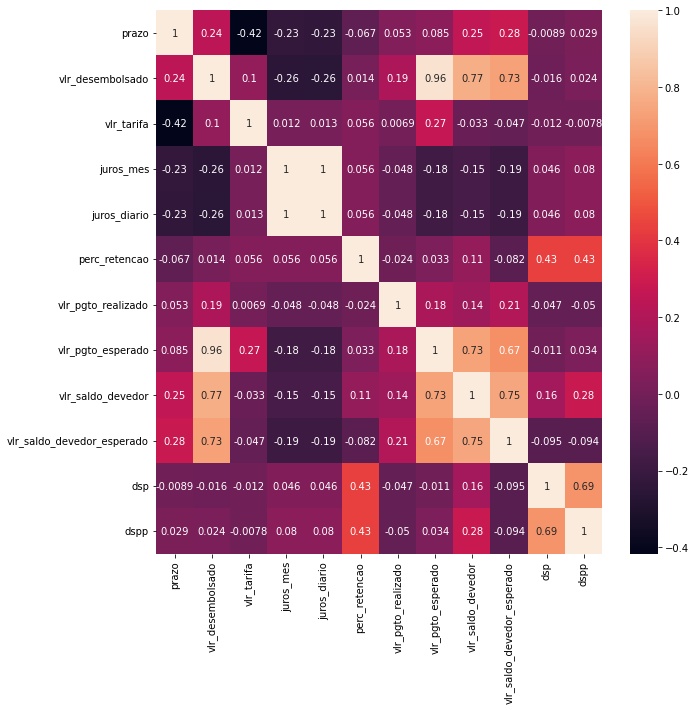

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_portfolio_geral_EDA[num_features_portfolio_geral_EDA].corr(), annot=True)

* Num primeiro contato com essa matriz de correlação, é possível observar correlação positiva e, relativamente, como a mais forte, correlação de **0.69**, entre dspp (dias sem pagamento do principal) e o dsp (dias sem pagamento), assim é necessário analisar essas duas variáveis com profundidade.
* Outra variável importante a ser analisada é o percentual de retenção da maquininha (perc_retencao) em relação ao dspp e dsp, porque apresenta a segunda correlação mais forte com **0.43**.

## Análise entre variáveis: dsp X dspp.
* Qual é a importância do cliente não pagar o principal em relação ao não pagamento integral (impostos + amortização + principal)?

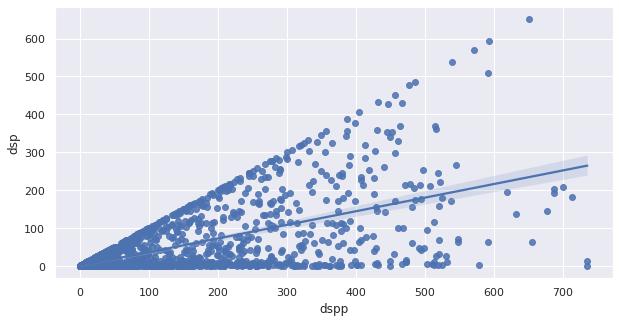

In [25]:
ax = sns.set_theme(color_codes=True)
ax = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df_portfolio_geral_EDA.sample(5000, random_state=0), x="dspp", y="dsp", alpha=.3)
ax = sns.regplot(data=df_portfolio_geral_EDA.sample(5000, random_state=0), x="dspp", y="dsp")

* Apliquei a função **scatterplot()** para visualizar a relação do dsp e o dspp.
* Depois disso, apliquei a função **regplot()** para sobrepor uma regressão linear no scatterplot().
* Usei também a função **sample(5000, random_state=0)** para reduzir o custo computacional ao rodar a célula.
* Ao analisar o gráfico: 
  * A variância aumenta ao longo do tempo, isso significa que quanto mais dspp ou mais dsp, há aumento de incerteza na relação linear.

## Análise entre variáveis: dsp X perc_retencao.
* Existe uma relação entre os dias sem pagamento e o percentual de retenção?

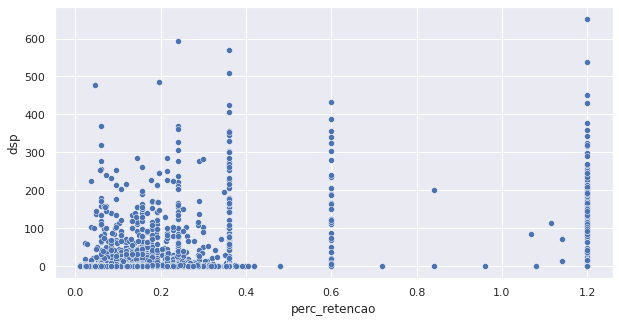

In [26]:
ax = sns.set_theme(color_codes=True)
ax = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df_portfolio_geral_EDA.sample(5000, random_state=0), x="perc_retencao", y="dsp")

* Apliquei a função **scatterplot()** para visualizar a relação do dsp e perc_retencao.
* Não há uma relação aparente entre perc_retencao e dsp.
* Há uma grande concentração de observações entre 0 e 0.4 perc_retencao.
* Há uma concentração de observações no 0.6 e no 1.2.
* Vou aplicar a função **cut()** para agrupar os valores de perc_retencao, e conseguir analisar por boxplot.

In [27]:
perc_retencao_cat = [0.0, 0.5, 2.0]
df_portfolio_geral_EDA["perc_retencao_cat"] = pd.cut(df_portfolio_geral_EDA['perc_retencao'],
                                                     perc_retencao_cat,
                                                     labels=["baixo_perc_retencao",
                                                             "alto_perc_retencao"])

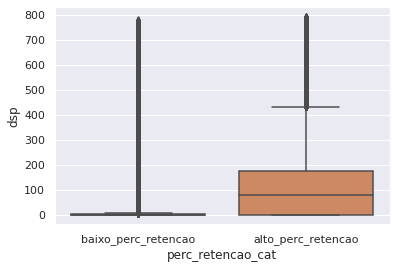

In [28]:
sns.boxplot(data=df_portfolio_geral_EDA, x="perc_retencao_cat", y='dsp')

*	Depois disso, apliquei a função **boxplot()** para visualizar as medianas e outliers.
* Grande quantidade de **outliers** nos dois grupos, assim é melhor escolher um teste para comparar os dois grupos usando mediana, que é uma medida de centralidade mais robusta aos valores extremos.
* Hipótese: existe uma diferença das medianas de dsp dos grupos de baixo_perc_retencao e alto_perc_retencao.

In [29]:
hypothesis_test(df_portfolio_geral_EDA[df_portfolio_geral_EDA["perc_retencao_cat"]=="baixo_perc_retencao"]["dsp"],
                df_portfolio_geral_EDA[df_portfolio_geral_EDA["perc_retencao_cat"]=="alto_perc_retencao"]["dsp"])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Teste de Shapiro-Wilk: valor-p do grupo A: 0.000, valor-p do Grupo B: 0.000.
O Teste de Shapiro-Wilk demonstrou que, no mínimo, algum dos dois grupos não tem distribuição normal dos dados.
Teste de Mann-Whitney-U: stats: 808225265999.500, valor-p: 0.000.
O teste Mann-Whitney-U demonstrou que as medianas dos dois grupos não são iguais: p-valor de 0.000.


* Apliquei a função **hypothesis_test()** para fazer os testes estatísticos e, portanto, uma inferência mais correta dos grupos.
* **H0**: não existe uma diferença das medianas de dsp dos grupos de baixo_perc_retencao e alto_perc_retencao.
* **H1**: existe uma diferença das medianas de dsp dos grupos de baixo_perc_retencao e alto_perc_retencao.
* A partir do teste Mann-Whitney-U:
  * **H1 não é rejeitada, pois o p-valor<=0.05**.
  * Por que usei esse teste?
    * É robusto a **outliers**, porque usa a mediana.
    * As distribuições dos dois grupos não são iguais.



# Pré-processamento

## Quantidade de campanhas
* Criei uma cópia do df_portfolio_comunicados_EDA e armazenei como df_portfolio_comunicados_preprocessing.
* Apliquei a função **groupby()** e **agg()** no dataset df_portfolio_comunicados_preprocessing, porque preciso saber se a mesma campanha será contabilizada duas vezes no mesmo dia ou não.

In [30]:
df_portfolio_comunicados_preprocessing = df_portfolio_comunicados_EDA.copy()

df_portfolio_comunicados_preprocessing[["contrato_id", "dt_ref_portfolio", "acao"]]\
 .groupby(["contrato_id", "dt_ref_portfolio"]).agg(["value_counts"])

acao
                                                                         value_counts
contrato_id                      dt_ref_portfolio acao                               
000180509391a5ac66ff83cae603ffb8 2020-12-29       campanhaobservacao                2
                                 2021-01-03       campanhaparcelamento              2
000c35a61297edadc2842f6d5b4028e1 2020-10-28       campanhaobservacao                2
                                 2021-01-23       campanhaobservacao                2
                                 2021-02-13       campanhaobservacao                2
...                                                                               ...
fffb47b9ce3835c85513ef5b19165f6e 2020-05-26       campanhaobservacao                2
                                 2020-05-31       campanhaparcelamento              2
                                 2020-06-05       campanhaboletoquitado             2
                                 2020-06-20       campanhaprenegativacao            2
fffc9af28349e8ded3af8e2dcbf9c3bc 2020-11-20       campanhaobservacao                2

[201870 rows x 1 columns]

* Apliquei a função **unique()** no dataset agrupado para saber se existem dois valores únicos por linha em todo o dataset. 

In [31]:
df_portfolio_comunicados_preprocessing[["contrato_id", "dt_ref_portfolio", "acao"]]\
 .groupby(["contrato_id", "dt_ref_portfolio"]).agg(["value_counts"])['acao']['value_counts'].unique()

array([2])

* O único valor presente nesse agrupamento é o **2**, o que confirma a ideia de mandar dois comunicados por campanha.
* Vou substituir nesse agrupamento o número **2** pelo **1**, porque a campanha engloba os **2** comunicados em um mesmo dia. 

In [32]:
df_portfolio_comunicados_preprocessing_campanha_unica = df_portfolio_comunicados_preprocessing[["contrato_id", "dt_ref_portfolio", "acao"]]\
.groupby(["contrato_id", "dt_ref_portfolio"]).agg(["value_counts"])

* Apliquei a função **loc[:]** para selecionar todas as linhas e substituir por **1**.

In [33]:
df_portfolio_comunicados_preprocessing_campanha_unica.loc[:] = 1

* Depois disso, irei aplicar a função **groupby("contrato_id")** e **agg("sum")** para somar o número de campanhas feitas por cliente.

In [34]:
df_portfolio_comunicados_preprocessing_campanha_unica = df_portfolio_comunicados_preprocessing_campanha_unica.groupby("contrato_id").agg("sum")

In [35]:
df_portfolio_comunicados_preprocessing_campanha_unica = df_portfolio_comunicados_preprocessing_campanha_unica["acao"]

In [36]:
df_portfolio_comunicados_preprocessing_campanha_unica = df_portfolio_comunicados_preprocessing_campanha_unica\
.rename(columns={"value_counts": "quantidade_campanhas_total"}).reset_index()

* Apliquei a função **rename()** para renomear a coluna "value_counts" para quantidade_campanhas_total.
* Apliquei o **reset_index()** para resetar o index e considerar o contrato_id como uma coluna, porque será importante para fundir os datasets.

## Quantidade de engajamento

* Apliquei a função **copy()** para criar uma cópia do df_portfolio_geral_EDA e armazená-lo no df_portfolio_geral_preprocessing.

In [37]:
df_portfolio_geral_preprocessing = df_portfolio_geral_EDA.copy()

In [38]:
df_portfolio_geral_preprocessing["dt_ref_portfolio"] = df_portfolio_geral_preprocessing["dt_ref_portfolio"]\
.astype("datetime64")

* Apliquei a função **astype("datetime64")** para conseguir ordenar as datas da feature dt_ref_portfolio.

In [39]:
df_engajamento = df_portfolio_geral_preprocessing[["contrato_id", 
                                                         "dt_ref_portfolio", 
                                                         "dsp", 
                                                         "perc_retencao_cat"]]\
                                                         .sort_values(by=["contrato_id", "dt_ref_portfolio"])\
                                                         .groupby("contrato_id").agg(["first", "last"])

df_engajamento["engajamento"] = df_engajamento["dsp"]["last"]-df_engajamento["dsp"]["first"]

df_engajamento.columns[:-1].tolist()
df_engajamento = df_engajamento.rename(columns={('engajamento', ''): "engajamento",
                                                ('perc_retencao_cat', 'first'): "perc_retencao_cat_ultimo",
                                                ('perc_retencao_cat', 'last'): "perc_retencao_cat_primeiro"})

* Usei a função **sort_values()** para ordenar o dataset por meio das datas, **groupby("contrato_id")** e **agg(["first", "last"])**. Por quê?
  * O tipo de agregação que eu fiz compara o primeiro registro do contrato_id pelo registro mais recente. O que dá noção da quantidade de engajamento que o cliente teve.
* Armazenei esse novo dataset na variável chamada df_engajamento.
* No df_engajamento, criei uma coluna chamada de engajamento, sendo contruída a partir da seguinte fórmula: 
  * df_engajamento["dsp"]["last"]-df_engajamento["dsp"]["first"]
* Apliquei a função rename() para renomear as colunas e manter o padrão do dataset.

In [40]:
df_engajamento.head(3)

dt_ref_portfolio              dsp       \
                                            first       last first last   
contrato_id                                                               
000180509391a5ac66ff83cae603ffb8       2020-06-15 2022-04-18     0    0   
000c35a61297edadc2842f6d5b4028e1       2020-09-29 2022-04-18     0    0   
000dcdc93a545ee45a1aee85ef85c34a       2020-08-04 2022-04-18     0    0   

                                    perc_retencao_cat                       \
                                                first                 last   
contrato_id                                                                  
000180509391a5ac66ff83cae603ffb8  baixo_perc_retencao  baixo_perc_retencao   
000c35a61297edadc2842f6d5b4028e1  baixo_perc_retencao   alto_perc_retencao   
000dcdc93a545ee45a1aee85ef85c34a  baixo_perc_retencao  baixo_perc_retencao   

                                 engajamento  
                                              
contrato_id                                   
000180509391a5ac66ff83cae603ffb8           0  
000c35a61297edadc2842f6d5b4028e1           0  
000dcdc93a545ee45a1aee85ef85c34a           0

* Apliquei a função **head()** para saber como os dados estão organizados em um primeiro contato.

In [41]:
df_engajamento = df_engajamento.reset_index()
df_engajamento.contrato_id.nunique()

14756

* Apliquei a função **reset_index()** para o contrato_id se tornar uma coluna, porque será a chave para fundir o dataset com outro.
* Apliquei a função **nunique()** para contar os valores únicos.
* Depois da transformação manteve-se a quantidade de valores únicos do contrato_id: **14756** valores únicos.

## Quantidade de campanhas x quantidade de engajamento

In [42]:
df_portfolio_comunicados_geral_preprocessing = pd.merge(df_portfolio_comunicados_preprocessing_campanha_unica, 
                                                  df_engajamento[['contrato_id', 'engajamento']], 
                                                  how='right', 
                                                  on=['contrato_id'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


* Apliquei a função **merge(how="right, on=["contrato_id"])** para fundir df_portfolio_geral_preprocessing_campanha_unica e o df_engajamento.
* O novo dataset se chama df_portfolio_comunicados_geral_preprocessing

# EDA 02

## Quantidade de campanhas x quantidade de engajamento

In [43]:
df_portfolio_comunicados_geral_preprocessing.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14756 entries, 0 to 14755
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contrato_id                 14756 non-null  object 
 1   quantidade_campanhas_total  12202 non-null  float64
 2   (engajamento, )             14756 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 461.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


* Apliquei a função **info(null_counts=True)** para analisar os dados nulos no dataset df_portfolio_comunicados_geral_preprocessing
* Há 2554 dados nulos na variável quantidade_campanhas_total.

In [44]:
df_portfolio_comunicados_geral_preprocessing.head(3)

,contrato_id,quantidade_campanhas_total,"(engajamento, )"
0,000180509391a5ac66ff83cae603ffb8,2.0,0
1,000c35a61297edadc2842f6d5b4028e1,12.0,0
2,000dcdc93a545ee45a1aee85ef85c34a,35.0,0


* Apliquei o **head()** para ter um primeiro contato com o dataset.

In [45]:
df_portfolio_comunicados_geral_preprocessing = df_portfolio_comunicados_geral_preprocessing\
.rename(columns={("engajamento", ""): "engajamento"})

* Apliquei a função **rename()** para corrigir a variável engajamento que estava dentro de uma tupla.

In [46]:
df_portfolio_comunicados_geral_preprocessing.describe()

,quantidade_campanhas_total,engajamento
count,12202.000000,14756.000000
mean,16.544009,41.480957
std,14.739786,97.180029
min,1.000000,0.000000
25%,5.000000,0.000000
50%,12.000000,0.000000
75%,24.000000,14.000000
max,93.000000,791.000000


* Apliquei **describe()** para ter uma noção da distribuição dos dados.
* Valores extremos na quantidade_campanhas_total e no engajamento.
* A variável engajamento tem alta concentração de valores nulos. Abaixo do percentil 50% só tem 0.
* Como é a curva de distribuição da quantidade_campanhas_total?
* Como é a curva de distribuição de engajamento? 

[(0.0, 100.0)]

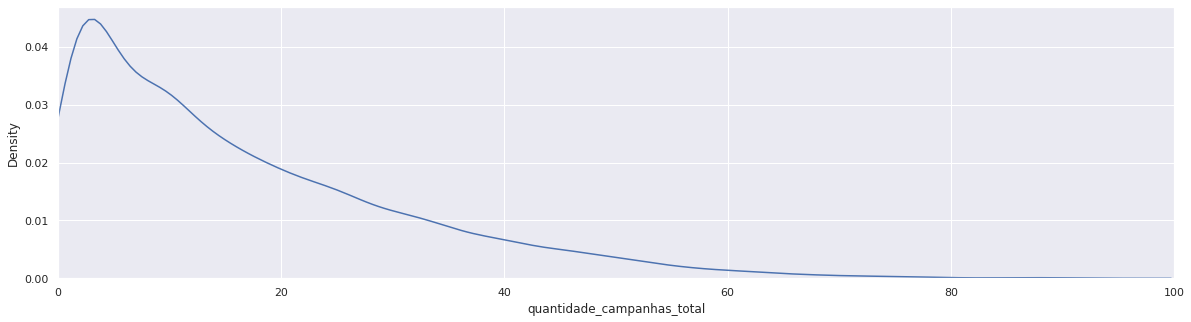

In [47]:
ax = plt.figure(figsize=(20, 5))
ax = sns.kdeplot(df_portfolio_comunicados_geral_preprocessing['quantidade_campanhas_total'])
ax.set(xlim=(0, 100))


* Apliquei a função **kdeplot()** para compreender visualmente a distribuição da variável quantidade_campanhas_total.
* O pico da distribuição da quantidade_campanha_total está próxima de 5.
* A distribuição é assimétrica à direita.



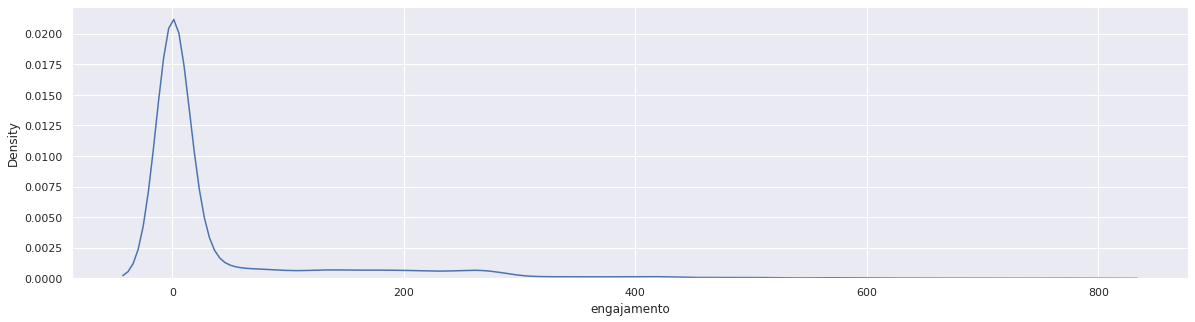

In [48]:
ax = plt.figure(figsize=(20, 5))
ax = sns.kdeplot(df_portfolio_comunicados_geral_preprocessing['engajamento'])

* Apliquei a função **kdeplot()** para compreender visualmente a distribuição engajamento.
* O engajamento dos clientes está próximo de 0, o que significa que fica extremamente difícil avaliar o engajamento por valores numéricos discretos, por quê? Por um motivo: 
  * O engajamento foi calculado a partir da primeira data registrada do contrato de empréstimo subtraída pela última data. Isso gerou um viés de quanto mais dias o cliente deixar de pagar e voltar a pagar novamente é algo melhor que deixar de pagar alguns dias e voltar a pagar novamente, o que está errado completamente, porque não representam a maior parte da distribuição amostral.
* Uma solução para diminuir esse viés é transformar a variável engajamento em uma variável categórica, se o engajamento for maior que 0, será considerado 1, caso contrário será 0.

# Pré-Processamento 02: transformar variável *engajamento* em boleano.

In [49]:
df_portfolio_comunicados_geral_preprocessing_02 = df_portfolio_comunicados_geral_preprocessing.copy()

* Apliquei a função **copy()** para copiar o df_portfolio_comunicados_geral_preprocessing e armazenar na variável df_portfolio_comunicados_geral_preprocessing_02.

In [50]:
df_portfolio_comunicados_geral_preprocessing_02['engajamento_boleano'] = df_portfolio_comunicados_geral_preprocessing_02['engajamento'].astype(bool)

* Apliquei a função **astype(bool)** para transformar a coluna *engajamento* em boleano e armazená-la na nova coluna chamada de *engajamento_boleano*.

In [51]:
df_portfolio_comunicados_geral_preprocessing_02

,contrato_id,quantidade_campanhas_total,engajamento,engajamento_boleano
0,000180509391a5ac66ff83cae603ffb8,2.0,0,False
1,000c35a61297edadc2842f6d5b4028e1,12.0,0,False
2,000dcdc93a545ee45a1aee85ef85c34a,35.0,0,False
3,0014cccd47b66a47af4e62c4dcbe95f1,11.0,34,True
4,001621e2d725ab3d3773692745be79b2,9.0,4,True
...,...,...,...,...
14751,fff6edc99168d63a10ea51a7f808ff38,4.0,0,False
14752,fff95c9441dc478a4991f4a2a8c55111,NaN,0,False
14753,fffb0d6ec51d163ca8c69900f748d61b,22.0,6,True
14754,fffb47b9ce3835c85513ef5b19165f6e,4.0,0,False


In [52]:
df_portfolio_comunicados_geral_preprocessing_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14756 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contrato_id                 14756 non-null  object 
 1   quantidade_campanhas_total  12202 non-null  float64
 2   engajamento                 14756 non-null  int64  
 3   engajamento_boleano         14756 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 991.6+ KB


* Apliquei a função **info()** para verificar se o engajamento_boleano tem o tipo de dado boleano e valores nulos
* O tipo de dado do engajamento_boleano está como int64.
* A quantidade de campanhas apresenta muitos valores nulos.

In [53]:
df_portfolio_comunicados_geral_preprocessing_02["engajamento_boleano"] = df_portfolio_comunicados_geral_preprocessing_02\
["engajamento_boleano"].astype(bool)

* Apliquei o **astype(bool)** na variável engajamento_boleano.

In [54]:
df_portfolio_comunicados_geral_preprocessing_02.dropna(axis=0, inplace=True)

* Apliquei a função **dropna(axis=0)** para remover as observações com os valores nulos. Por quê?
  * O engajamento_boleano só faz sentido se existir algum valor na quantidade_campanhas_total, caso contrário não existe engajamento.

In [55]:
df_portfolio_comunicados_geral_preprocessing_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12202 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contrato_id                 12202 non-null  object 
 1   quantidade_campanhas_total  12202 non-null  float64
 2   engajamento                 12202 non-null  int64  
 3   engajamento_boleano         12202 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 393.2+ KB


In [56]:
df_portfolio_comunicados_geral_preprocessing_02.contrato_id.nunique()

12202

* Apliquei a função **nunique()** para saber quantos contratos únicos há no dataset.
* Há **12 202** contratos únicos.

In [57]:
df_portfolio_comunicados_geral_preprocessing_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12202 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contrato_id                 12202 non-null  object 
 1   quantidade_campanhas_total  12202 non-null  float64
 2   engajamento                 12202 non-null  int64  
 3   engajamento_boleano         12202 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 393.2+ KB


# EDA 03

## quantidade_campanhas_total x engajamento_boleano.

* A medida central é diferente entre os grupos engajados e não engajados? 

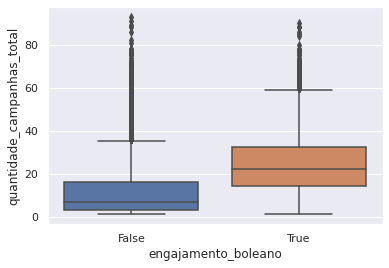

In [58]:
sns.boxplot(data=df_portfolio_comunicados_geral_preprocessing_02,
            x="engajamento_boleano", y="quantidade_campanhas_total")

* Apliquei um **boxplot()** para comparar clientes engajados ou não engajados em relação à quantidade_campanhas_total
* Apesar de ter muitos outliers, as medianas são visivelmente diferentes entre si.
* O grupo engajado apresenta aproximadamente 20 campanhas na mediana, enquanto o grupo não engajado apresenta aproximadamente 5 campanhas na mediana.
* Essa diferença é estatisticamente significativa?
* Aplicarei a função criada **hypothesis_test()** para saber se essa diferença é significativa.

In [59]:
hypothesis_test(df_portfolio_comunicados_geral_preprocessing_02\
                [df_portfolio_comunicados_geral_preprocessing_02["engajamento_boleano"]==0]\
                ["quantidade_campanhas_total"],
                df_portfolio_comunicados_geral_preprocessing_02\
                [df_portfolio_comunicados_geral_preprocessing_02["engajamento_boleano"]==1]\
                ["quantidade_campanhas_total"])

Teste de Shapiro-Wilk: valor-p do grupo A: 0.000, valor-p do Grupo B: 0.000.
O Teste de Shapiro-Wilk demonstrou que, no mínimo, algum dos dois grupos não tem distribuição normal dos dados.
Teste de Mann-Whitney-U: stats: 7090165.000, valor-p: 0.000.
O teste Mann-Whitney-U demonstrou que as medianas dos dois grupos não são iguais: p-valor de 0.000.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* Teste de Mann-Whitney-U: deu **valor-p<=0.05**, isso significa que a mediana dos dois grupos não são iguais. E por que aplicar esse teste?
* Porque esse teste leva consideração a mediana como medida de centralidade, o que torna-o mais robusto aos *outliers*. Outro ponto é que, pelo teste de Shapiro-Wilk, os dois grupos tiveram distribuições não normais, o teste de Mann-Whitney-U não exige que os dois tenham distribuição normal.
* Se os dois grupos são diferentes, como muda a probabilidade do cliente se tornar engajado de acordo com a quantidade de campanhas?
* Para responder essa pergunta, aplicarei a função **regplot()** para plotar uma gráfico de regressão logística, relacionando quantidade_campanhas_total e engajamento_boleano.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


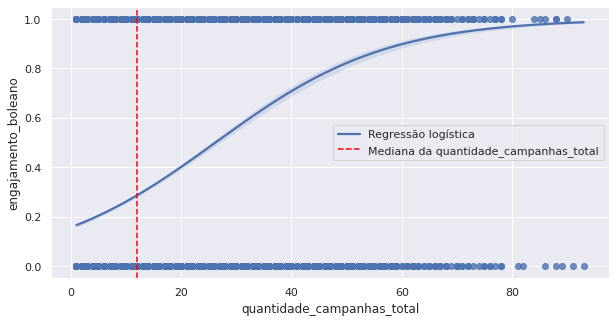

In [60]:
ax = plt.figure(figsize=(10, 5))
ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True)
ax.axvline(df_portfolio_comunicados_geral_preprocessing_02.quantidade_campanhas_total.median(), ls="--", c="red")
plt.legend(labels=["Regressão logística", "Mediana da quantidade_campanhas_total"])

* Apliquei um **regplot(logistic=True)** para visualizar a probabilidade do cliente ficar engajado dado a quantidade de campanhas totais por meio de uma regressão logística.
* O pressuposto dessa regressão logística é quanto maior a quantidade de campanhas feitas para um cliente, maior é probailidade de ter engajamento. 
* A mediana de 12 da quantidade_campanhas_total contando os dois grupos tem uma probabilidade de **30%** de um cliente ter engajamento, ou seja, voltar a pagar integralmente.
* Um grande problema relacionado a isso é: há muitos fatores os quais não foram relacionados à regressão logística, não sei ainda o impacto da quantidade de campanhas em relação ao engajamento. Por conta disso, irei usar a regressão logística do **statsmodel** para analisar mais profundamente essa relação.

In [61]:
import statsmodels.formula.api as smf
df_portfolio_comunicados_geral_preprocessing_02["engajamento_boleano"] = df_portfolio_comunicados_geral_preprocessing_02["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", data=df_portfolio_comunicados_geral_preprocessing_02.dropna(axis=0)).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.567775
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                12202
Model:                           Logit   Df Residuals:                    12200
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1318
Time:                         15:29:35   Log-Likelihood:                -6928.0
converged:                        True   LL-Null:                       -7979.5
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.6859      0.034    -49.111      0.0

* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítimica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [62]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.185, qtd_campanhas_odds_ratio: 1.066


* Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [63]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

15.63 %


* Supondo que a quantidade de campanhas por cliente seja igual a 0, a probabilidade de um cliente se tornar engajado é de **15,63%**.
* E quanto o aumento de campanhas contribui para o aumento de engajamento?

* Primeiro é necessário que qtd_campanhas_odds_ratio seja  subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [64]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

6.63 %


* Um aumento em **1 unidade** de quantidade de campanhas totais está associado ao aumento de **6.63%** na probabilidade do cliente ter engajamento.
* Como o número de acionamentos se comporta em relação ao modelo de sobrevivência? Porque a variável quantidade_campanhas_total é acumulada no tempo.
* Esse impacto é diferente por segmento da empresa?

## Modelo de sobrevivência.

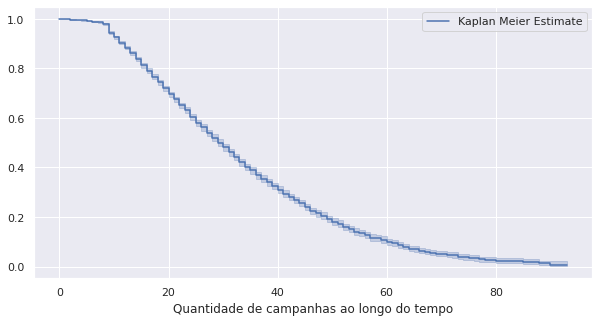

In [65]:
T = df_portfolio_comunicados_geral_preprocessing_02.quantidade_campanhas_total
E = df_portfolio_comunicados_geral_preprocessing_02.engajamento_boleano

## criar uma variável 
km = KaplanMeierFitter() 

## Treinar modelo
km.fit(T, E, label='Kaplan Meier Estimate')

## Criar estimativa
plt.figure(figsize=(10, 5))
ax = km.plot(ci_show=True)
ax = plt.xlabel("Quantidade de campanhas ao longo do tempo")


* Apliquei o **KaplanMeierFitter()** para compreender a quantidade de campanhas acumuladas ao longo do tempo e a probabilidade do cliente ter engajamento.
* No modelo de sobrevivência, notamos que quanto mais campanhas se passam, menor a probabilidade do cliente estar engajado.
* Se sobrepormos a regressão logística e o modelo de sobrevivência, descobriremos a quantidade ideal de campanhas?

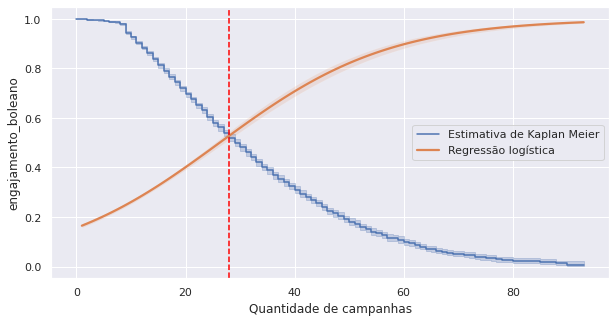

In [66]:
plt.figure(figsize=(10, 5))
ax = km.plot(ci_show=True)
ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(28, ls="--", c="red")
ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Apliquei as funções **plot()** e **regplot()** para sobrepor os modelos de regressão logística e de sobrevivência.
* Se a regressão logística relaciona quanto mais campanhas, maior a probabilidade de ter engajamento. Por outro lado, não leva em consideração que a quantidade de campanhas está relacionada também ao tempo e que muito provavelmente o cliente não estará engajado depois de, por exemplo, 80 campanhas.
* A curva ideal de acionamentos de campanhas por cliente: **28 campanhas por cliente**. Por quê?
  * O cruzamento entre a quantidade de campanhas totais e quantidade de campanhas acumuladas resulta na mesma probabilidade do cliente estar engajado, o que gera um valor mais confiável do que escolher uma quantidade de campanhas totais de 80 com uma probabilidade de regressão logística próxima de 95% e, na outra ponta, o modelo de sobrevivência com aproximadamente 5% de probabilidade de ter engajamento.
  * Um pressuposto adotado para sobrepor os modelos em um único gráfico foi o seguinte:
    * Quantidade de campanhas acumuladas = Quantidade de campanhas totais.
    * Por quê?
    * No momento que a quantidade de campanhas totais for definida e, depois, aplicada ao longo do tempo, baterá exatamente com a quantidade acumulada de campanhas.
    * Assim, é possível relacionar os dois modelos em um único gráfico, encontrando a intersecção de probabilidades de ter engajamento, o que torna a análise mais robusta.

## quantidade_campanhas_total x engajamento_boleano por segmento

### Análise de valores nulos

In [67]:
df_portfolio_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14405 entries, 0 to 14404
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nr_documento  14405 non-null  object
 1   tipo_empresa  14405 non-null  object
 2   cidade        14405 non-null  object
 3   estado        14405 non-null  object
 4   subsegmento   14405 non-null  object
 5   segmento      14405 non-null  object
dtypes: object(6)
memory usage: 675.4+ KB


In [68]:
df_portfolio_clientes.describe()

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
count,14405,14405,14405,14405,14405,14405
unique,14265,3,1502,28,16,9
top,76fdeebbddc25ce151c4ad4ecb9d70db,PJ,São Paulo,SP,Alimentação Rápida,Alimentação
freq,2,7893,1040,3767,2959,5216


* Apliquei **describe()** para compreender as variáveis com as maiores frequências.
* O segmento com maior frequência, com 5216 valores, é Alimentação. 

### Análise de valores duplicados

In [69]:
df_portfolio_clientes.shape, df_portfolio_clientes.drop_duplicates().shape

((14405, 6), (14379, 6))

* Apliquei a função **drop_duplicates()** para verificar se há valores duplicados no df_portfolio_clientes.
* df_portfolio_clientes tem valores duplicados, no pré-processamento será necessário remover os valores duplicados.

### Análise de contagem de valores.

* Apliquei as funções **drop_duplicates()**, **groupby()** e **agg()** para saber se existe alguma contagem de valores diferente de 1 para um único nr_documento.

In [70]:
df_portfolio_clientes[["nr_documento", "segmento"]].drop_duplicates().groupby("nr_documento").agg(["value_counts"])\
["segmento"]["value_counts"].unique()

array([1])

* Para um mesmo **nr_documento**, não existe mais de um segmento contado.

# Pré-Processamento 03

In [71]:
df_portfolio_geral_preprocessing_03 = df_portfolio_geral[["contrato_id", "nr_documento"]]\
.groupby("contrato_id").agg(lambda x:x.value_counts().index).reset_index()

* Apliquei a função **groupby()** e **agg()** para que o df_portfolio_geral tenha apenas contratos únicos no dataset df_portfolio_geral, depois eu armazenei no df_portfolio_geral_preprocessing_03.
* O nr_documento é a variável em comum do df_portfolio_clientes e do df_portfolio_geral.
* Primeiro vou aplicar a função **merge()** com a variável em comum contrato_id no df_portfolio_comunicados_geral_preprocessing_02 e df_portfolio_geral_preprocessing_03 para encontrar o **nr_documento** por cliente.

In [72]:
df_portfolio_comunicados_geral_preprocessing_03 = pd.merge(df_portfolio_comunicados_geral_preprocessing_02,
                                                           df_portfolio_geral_preprocessing_03, how="left", on="contrato_id")

In [73]:
df_portfolio_comunicados_geral_preprocessing_03.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12202 entries, 0 to 12201
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contrato_id                 12202 non-null  object 
 1   quantidade_campanhas_total  12202 non-null  float64
 2   engajamento                 12202 non-null  int64  
 3   engajamento_boleano         12202 non-null  int64  
 4   nr_documento                12202 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 572.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


* Depois do **merge()**, apliquei **info()** para checar os dados nulos.
* Não há valores nulos.
* Há 12202 observações.

## df_portfolio_clientes

In [74]:
df_portfolio_clientes_preprocessing_03 = df_portfolio_clientes.drop_duplicates()\
.groupby("nr_documento")\
.agg("last").reset_index()

* No df_portfolio_clientes, apliquei a função **drop_duplicates()** para remover linhas duplicadas, depois **groupby()** para agrupar as linhas pelo nr_documento. Além disso, **agg("last)** foi aplicado porque o segmento não muda de acordo com o nr_documento, assim ficará mais fácil selecionar as colunas que serão criadas no novo dataset.

## df_engajamento_campanha_segmento_preprocessing_03

In [75]:
df_engajamento_campanha_segmento_preprocessing_03 = pd.merge(df_portfolio_comunicados_geral_preprocessing_03,
                                                           df_portfolio_clientes_preprocessing_03[["nr_documento", 
                                                                                                   "segmento"]],
                                                           how="left", 
                                                           on="nr_documento")

* Apliquei a função **merge()** para unir df_portfolio_comunicados_geral_preprocessing_03 e df_portfolio_clientes_preprocessing_03 a partir da variável em comum nr_documento.

In [76]:
df_engajamento_campanha_segmento_preprocessing_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12202 entries, 0 to 12201
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contrato_id                 12202 non-null  object 
 1   quantidade_campanhas_total  12202 non-null  float64
 2   engajamento                 12202 non-null  int64  
 3   engajamento_boleano         12202 non-null  int64  
 4   nr_documento                12202 non-null  object 
 5   segmento                    12202 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 667.3+ KB


In [77]:
df_engajamento_campanha_segmento_preprocessing_03.contrato_id.nunique()

12202

* Apliquei a função **nunique()** para verificar o número de contrato_id únicos, que deu **12 202**.

In [78]:
df_engajamento_campanha_segmento_preprocessing_03.head(3)

,contrato_id,quantidade_campanhas_total,engajamento,engajamento_boleano,nr_documento,segmento
0,000180509391a5ac66ff83cae603ffb8,2.0,0,0,7996daab1bbe000bb5d1cc1bf317f390,Alimentação
1,000c35a61297edadc2842f6d5b4028e1,12.0,0,0,1191ebfa94d3ca2e8a02f696aafde4a4,Varejo
2,000dcdc93a545ee45a1aee85ef85c34a,35.0,0,0,cd1178c3ed53ebe730ba521617cb574b,Bens duráveis


* Irei remover duas colunas que não serão usadas na análise por meio da função **drop(axis=1)**:
  * engajamento
  * nr_documento

In [79]:
df_engajamento_campanha_segmento_preprocessing_03.drop(["engajamento", "nr_documento"], axis=1, inplace=True)

In [80]:
df_engajamento_campanha_segmento_preprocessing_03.head(3)

,contrato_id,quantidade_campanhas_total,engajamento_boleano,segmento
0,000180509391a5ac66ff83cae603ffb8,2.0,0,Alimentação
1,000c35a61297edadc2842f6d5b4028e1,12.0,0,Varejo
2,000dcdc93a545ee45a1aee85ef85c34a,35.0,0,Bens duráveis


# EDA 04:

## segmento x quantidade_campanhas_total x engajamento_boleano.

In [81]:
df_engajamento_campanha_segmento_preprocessing_03.segmento.unique()

array(['Alimentação', 'Varejo', 'Bens duráveis', 'Serviços recorrentes',
       'Serviços', 'Viagens e entretenimento', 'Supermercado/Farmácia',
       'Posto', 'Outros'], dtype=object)

* Apliquei a função **unique()** para saber quantos segmentos únicos existem no novo dataset df_engajamento_campanha_segmento_preprocessing_03.
* São 9 segmentos únicos no novo dataset.
* Existe diferença de alguma medida de centralidade entres esses segmentos em relação à quantidade de campanhas?


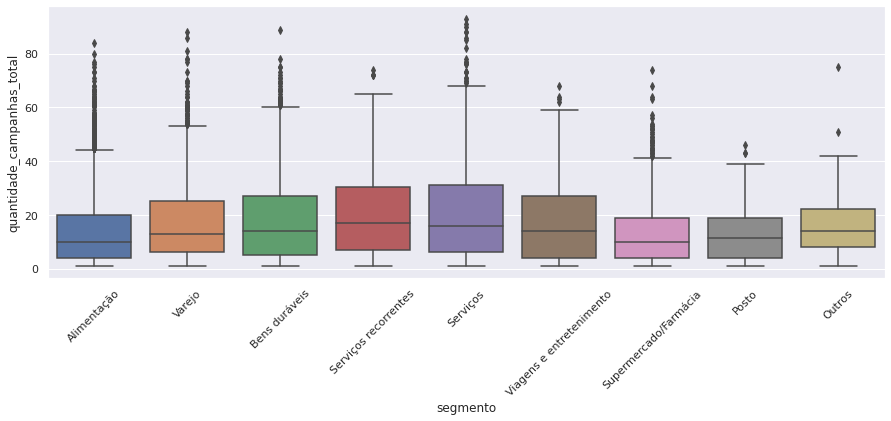

In [82]:
ax = plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=df_engajamento_campanha_segmento_preprocessing_03,
            x="segmento",
            y="quantidade_campanhas_total")
ax.tick_params(axis='x', rotation=45)


* Apliquei a função **boxplot()** para visualizar a mediana, outliers e distribuição dos grupos por segmento.
* Visualmente, as medianas variam entre 10 a 20 quantidades de campanha.
* Os segmentos de alimentação e supermercado/farmácia apresentam na mediana as menores quantidades de campanhas totais entre todos os segmentos, próximo de 10 campanhas.
* Os segmentos de serviços recorrentes e serviços apresentam na mediana as maiores quantidade de campanhas totais entre todos os segmentos, próximo de 20 campanhas.
* Além da diferença entre quantidade de campnhas totais, como a quantidade de campanhas ao longo da jornada do cliente está relacionada à probabilidade de ter engajamento?

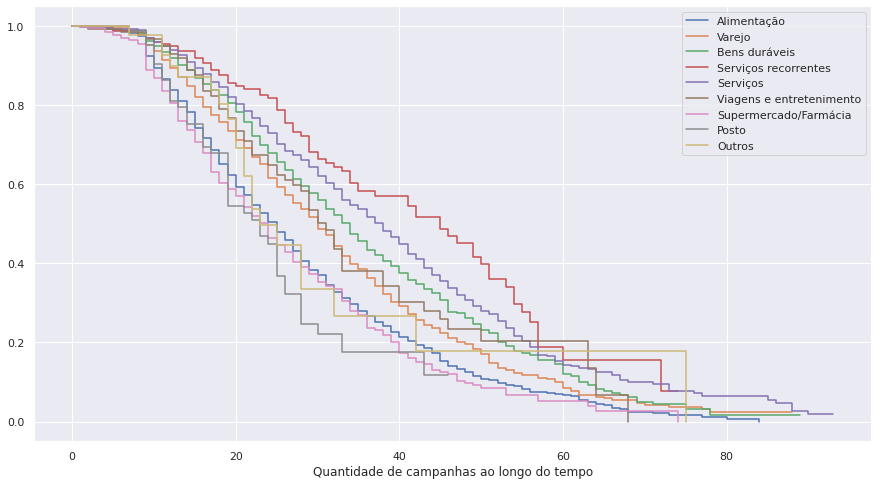

In [83]:
T_1 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Alimentação"].quantidade_campanhas_total
E_1 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Alimentação"].engajamento_boleano

T_2 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Varejo"].quantidade_campanhas_total
E_2 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Varejo"].engajamento_boleano

T_3 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Bens duráveis"].quantidade_campanhas_total
E_3 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Bens duráveis"].engajamento_boleano

T_4 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Serviços recorrentes"].quantidade_campanhas_total
E_4 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Serviços recorrentes"].engajamento_boleano

T_5 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Serviços"].quantidade_campanhas_total
E_5 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Serviços"].engajamento_boleano

T_6 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Viagens e entretenimento"].quantidade_campanhas_total
E_6 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Viagens e entretenimento"].engajamento_boleano

T_7 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Supermercado/Farmácia"].quantidade_campanhas_total
E_7 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Supermercado/Farmácia"].engajamento_boleano

T_8 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Posto"].quantidade_campanhas_total
E_8 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Posto"].engajamento_boleano

T_9 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Outros"].quantidade_campanhas_total
E_9 = df_engajamento_campanha_segmento_preprocessing_03\
[df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Outros"].engajamento_boleano

## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_1, E_1, label='Alimentação')
ax = km.plot(ci_show=False)
km.fit(T_2, E_2, label='Varejo')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_3, E_3, label='Bens duráveis')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_4, E_4, label='Serviços recorrentes')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_5, E_5, label='Serviços')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_6, E_6, label='Viagens e entretenimento')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_7, E_7, label='Supermercado/Farmácia')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_8, E_8, label='Posto')
ax = km.plot(ci_show=False, ax=ax)
km.fit(T_9, E_9, label='Outros')

## Criar estimativa
ax = km.plot(ci_show=False, ax=ax)
ax = plt.xlabel("Quantidade de campanhas ao longo do tempo")

* Apliquei a função **KaplanMeierFitter()** para treinar o modelo de sobrevivência Kaplan Meier por segmento. E por quê?
  * Porque o segmento da empresa pode influenciar na quantidade de campanhas ideal.
  * Porque o modelo de sobrevivência leva em consideração o componente temporal presente na variável quantidade de campanhas, afinal as campanhas são acionadas dependento dos dias sem pagamento.
* É possível analisar que as empresas da maioria dos segmentos acabam desengajando, a probabilidade de até **10%** de se tornarem engajadas, a partir de **80** campanhas acumuladas ao longo do tempo.
* Empresas do segmento de **posto** se tornam desengajadas mais rápido.
* Empresas do segmento de **serviços recorrentes** desengajam mais lentamente dos que os outros segmentos.
* Irei comparar as probabilidades do modelo de sobrevivência e a regressão logística para todos os segmentos, assim é possível estabelecer a quantidade de campanhas totais ideal por segmento.
* Qual é a curva ideal de vezes para acionar o cliente de segmentos específicos?

### Segmento: Serviços Recorrentes

In [84]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Serviços recorrentes"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.539181
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                  287
Model:                           Logit   Df Residuals:                      285
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                 0.09877
Time:                         15:30:12   Log-Likelihood:                -154.74
converged:                        True   LL-Null:                       -171.70
Covariance Type:             nonrobust   LLR p-value:                 5.752e-09
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.9769      0.249     -7.951      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [85]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.139, qtd_campanhas_odds_ratio: 1.047



Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [86]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

12.17 %


* Supondo que a quantidade de campanhas por cliente do segmento **Serviços recorrentes** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **12,17%**.
* E quanto o aumento de campanhas contribui para o aumento de engajamento?
* Primeiro é necessário que qtd_campanhas_odds_ratio seja  subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [87]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

4.72 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **4.72%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

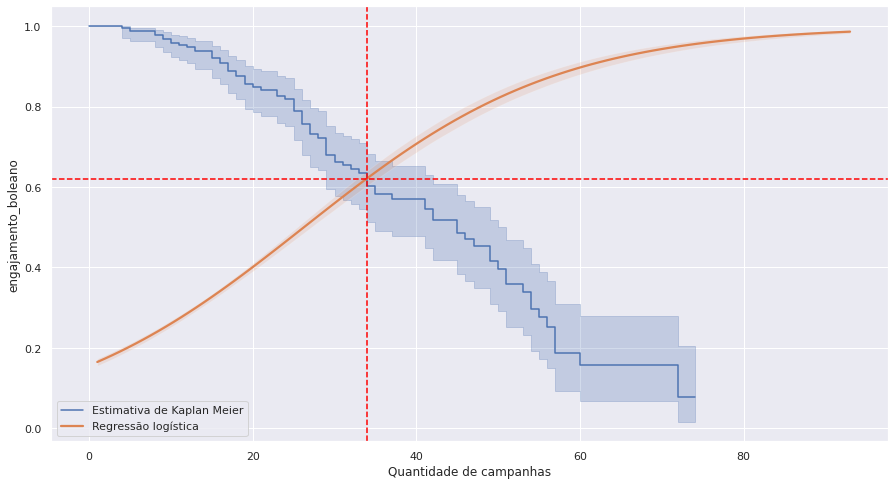

In [88]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_4, E_4, label='Serviços recorrentes')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(34, ls="--", c="red")
ax.axhline(0.62, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])

* Apliquei a função **plot()** e **regplot()** para sobrepor os dois modelos já mencionados e encontrar um consenso de probabilidade de engajamento.
* Os clientes no segmento **Serviços recorrentes** têm uma probabilidade de **62%** de se tornarem engajados quando há 34 campanhas totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de 34 campanhas. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 34 campanhas.

### Segmento: Posto

In [89]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Posto"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.594059
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                  128
Model:                           Logit   Df Residuals:                      126
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1072
Time:                         15:30:38   Log-Likelihood:                -76.040
converged:                        True   LL-Null:                       -85.174
Covariance Type:             nonrobust   LLR p-value:                 1.917e-05
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.5975      0.352     -4.538      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [90]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.202, qtd_campanhas_odds_ratio: 1.083


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [91]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

16.83 %


Supondo que a quantidade de campanhas por cliente do segmento **Posto** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **16,83%**.
E quanto o aumento de campanhas contribui para o aumento de engajamento?
Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [92]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

8.33 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **8.33%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

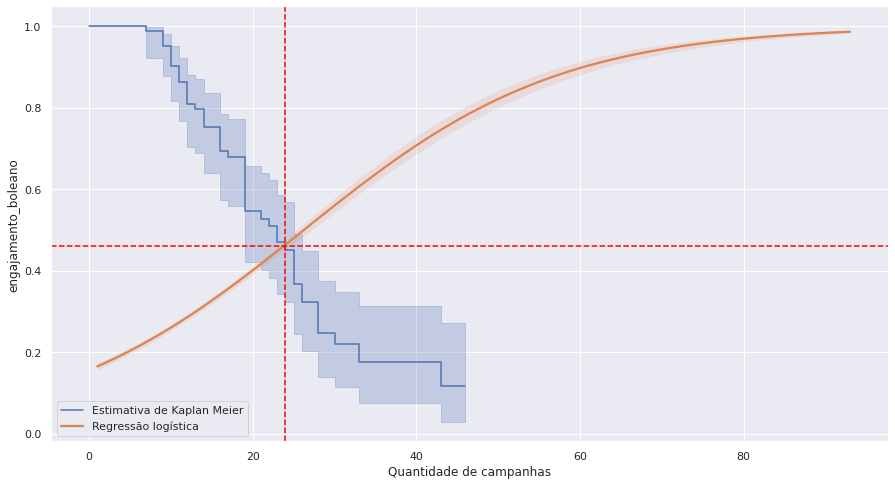

In [93]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_8, E_8, label='Posto')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(24, ls="--", c="red")
ax.axhline(0.46, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])

* Os clientes no segmento **Posto** têm uma probabilidade de **46%** de se tornarem engajados quando há **24 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **24 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 24 campanhas.

### Segmento: Alimentação

In [94]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Alimentação"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.546676
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                 4239
Model:                           Logit   Df Residuals:                     4237
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1702
Time:                         15:31:04   Log-Likelihood:                -2317.4
converged:                        True   LL-Null:                       -2792.6
Covariance Type:             nonrobust   LLR p-value:                1.096e-208
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.8076      0.060    -30.230      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [95]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.164, qtd_campanhas_odds_ratio: 1.092


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [96]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

14.09 %


* Supondo que a quantidade de campanhas por cliente do segmento **Alimentação** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **14,09%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [97]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

9.18 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **9.18%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

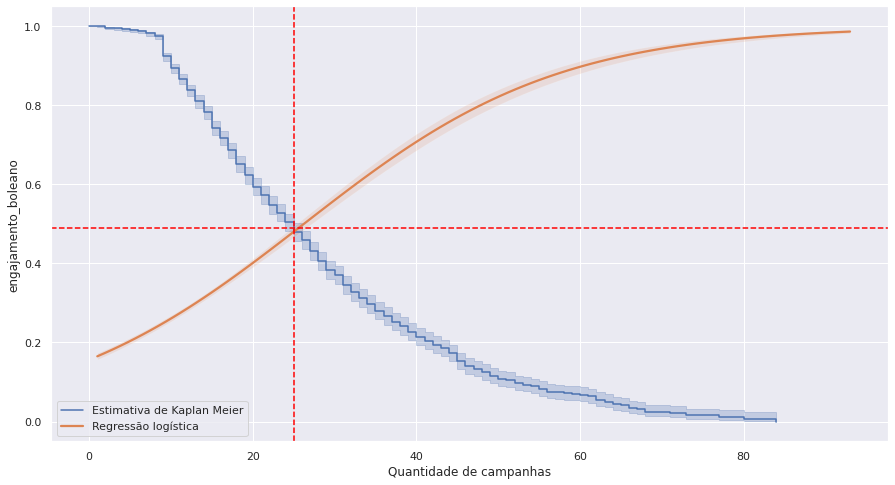

In [98]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_1, E_1, label='Alimentação')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(25, ls="--", c="red")
ax.axhline(0.49, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Alimentação** têm uma probabilidade de **49%** de se tornarem engajados quando há **25 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **25 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 25 campanhas.

### Segmento: Varejo

In [99]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Varejo"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.573456
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                 2398
Model:                           Logit   Df Residuals:                     2396
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1258
Time:                         15:31:29   Log-Likelihood:                -1375.1
converged:                        True   LL-Null:                       -1573.0
Covariance Type:             nonrobust   LLR p-value:                 4.928e-88
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.7103      0.080    -21.357      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [100]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.181, qtd_campanhas_odds_ratio: 1.067


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [101]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

15.31 %


* Supondo que a quantidade de campanhas por cliente do segmento **Varejo** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **15,31%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [102]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

6.69 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **6.69%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

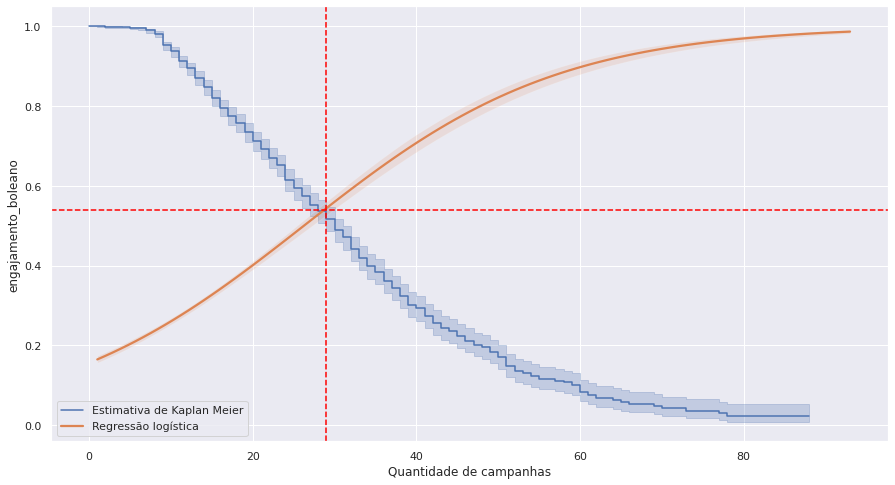

In [103]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_2, E_2, label='Varejo')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(29, ls="--", c="red")
ax.axhline(0.54, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Varejo** têm uma probabilidade de **54%** de se tornarem engajados quando há **29 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **29 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 29 campanhas.

### Segmento: Bens duráveis

In [104]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Bens duráveis"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.557071
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                 1957
Model:                           Logit   Df Residuals:                     1955
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1421
Time:                         15:31:55   Log-Likelihood:                -1090.2
converged:                        True   LL-Null:                       -1270.8
Covariance Type:             nonrobust   LLR p-value:                 1.592e-80
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.8095      0.089    -20.323      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [105]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.164, qtd_campanhas_odds_ratio: 1.063


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [106]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

14.07 %


* Supondo que a quantidade de campanhas por cliente do segmento **Bens duráveis** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **14,07%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [107]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

6.34 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **6.34%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

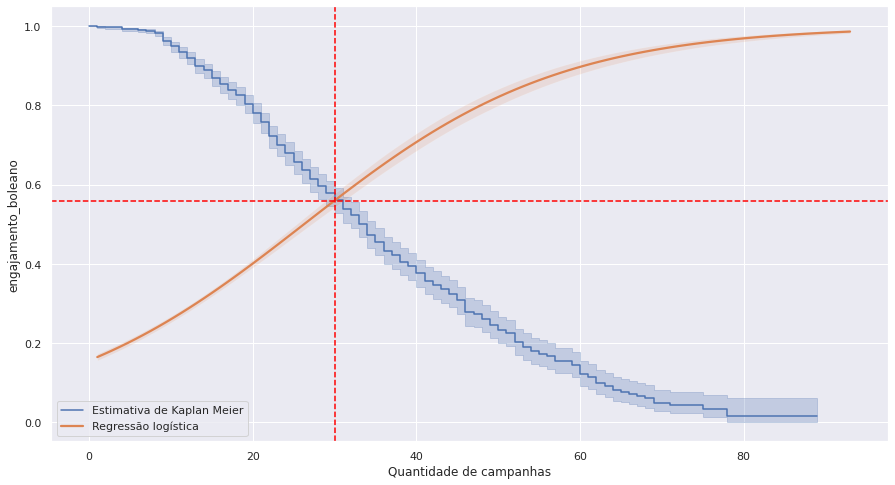

In [108]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_3, E_3, label='Bens duráveis')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(30, ls="--", c="red")
ax.axhline(0.56, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Bens duráveis** têm uma probabilidade de **56%** de se tornarem engajados quando há **30 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **30 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 30 campanhas.

### Segmento: Serviços

In [109]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Serviços"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.566061
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                 2060
Model:                           Logit   Df Residuals:                     2058
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1241
Time:                         15:32:21   Log-Likelihood:                -1166.1
converged:                        True   LL-Null:                       -1331.2
Covariance Type:             nonrobust   LLR p-value:                 8.184e-74
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.7730      0.087    -20.295      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [110]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.170, qtd_campanhas_odds_ratio: 1.055


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [111]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

14.52 %


* Supondo que a quantidade de campanhas por cliente do segmento **Serviços** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **14,52%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [112]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

5.46 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **5.46%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

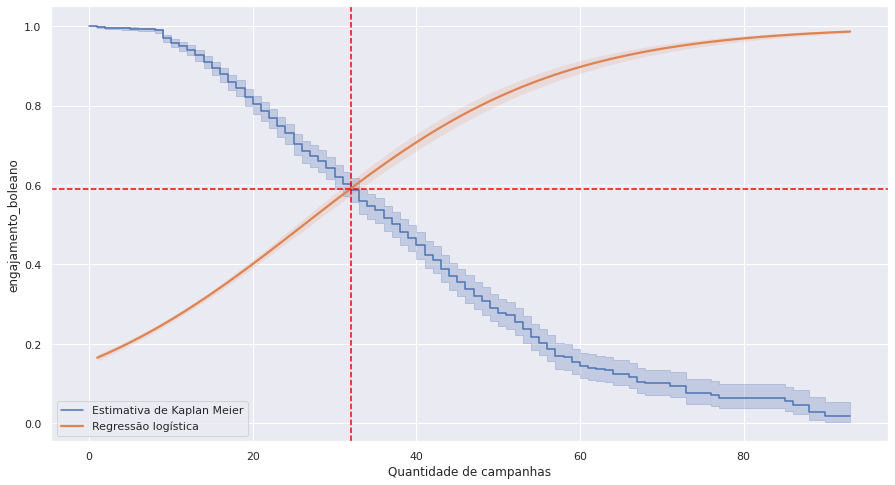

In [113]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_5, E_5, label='Serviços')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(32, ls="--", c="red")
ax.axhline(0.59, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Serviços** têm uma probabilidade de **59%** de se tornarem engajados quando há **32 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **32 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 32 campanhas.

### Segmento: Viagens e entretenimento

In [114]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Viagens e entretenimento"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.560562
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                  176
Model:                           Logit   Df Residuals:                      174
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1313
Time:                         15:32:47   Log-Likelihood:                -98.659
converged:                        True   LL-Null:                       -113.57
Covariance Type:             nonrobust   LLR p-value:                 4.713e-08
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.7687      0.294     -6.013      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [115]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.171, qtd_campanhas_odds_ratio: 1.064


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [116]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

14.57 %


* Supondo que a quantidade de campanhas por cliente do segmento **Viagens e entretenimento** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **14,57%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [117]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

6.36 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **6.36%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

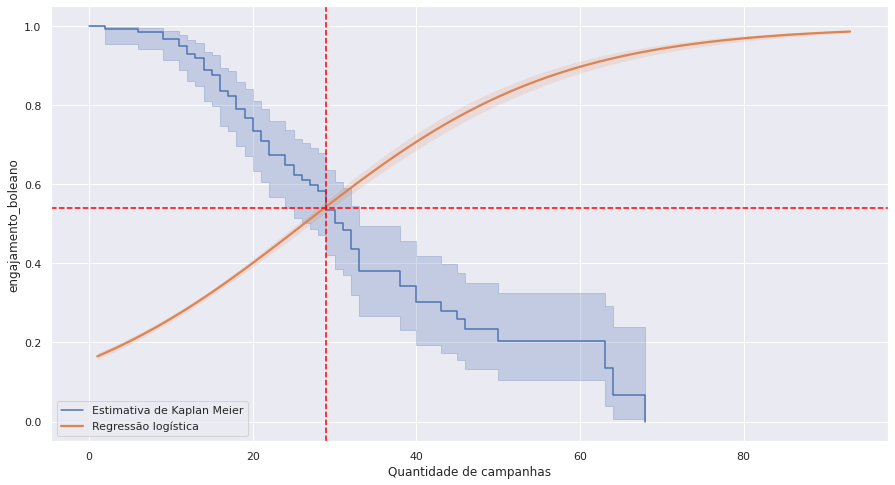

In [118]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_6, E_6, label='Viagens e entretenimento')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(29, ls="--", c="red")
ax.axhline(0.54, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Viagens e entretenimento** têm uma probabilidade de **54%** de se tornarem engajados quando há **29 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **29 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 29 campanhas.

### Segmento: Supermercado/Farmácia

In [119]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Supermercado/Farmácia"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.563430
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                  900
Model:                           Logit   Df Residuals:                      898
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1515
Time:                         15:33:12   Log-Likelihood:                -507.09
converged:                        True   LL-Null:                       -597.66
Covariance Type:             nonrobust   LLR p-value:                 2.729e-41
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.6596      0.125    -13.310      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [120]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.190, qtd_campanhas_odds_ratio: 1.089


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [121]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

15.98 %


* Supondo que a quantidade de campanhas por cliente do segmento **Supermercado/Farmácia** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **15,98%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [122]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

8.87 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **8.87%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

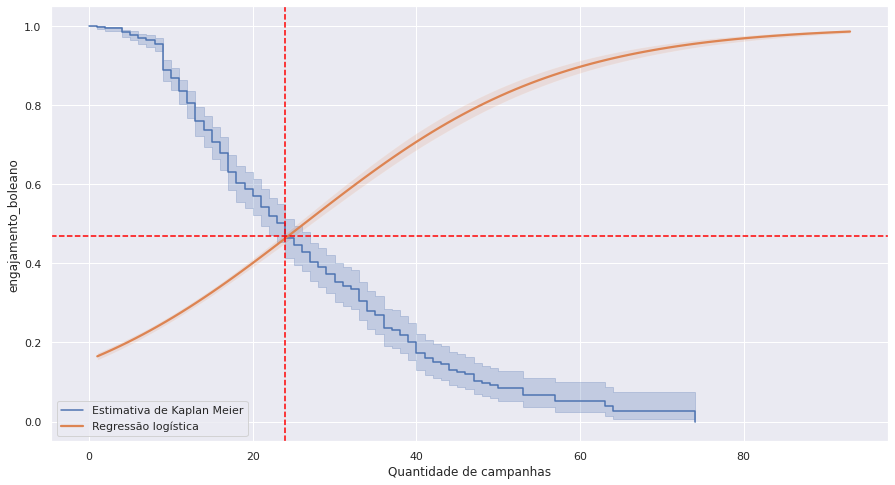

In [123]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_7, E_7, label='Supermercado/Farmácia')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(24, ls="--", c="red")
ax.axhline(0.47, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Supermercado/Farmácia** têm uma probabilidade de **47%** de se tornarem engajados quando há **24 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **24 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 24 campanhas.

### Segmento: Outros

In [124]:
df_engajamento_campanha_segmento_preprocessing_03["engajamento_boleano"] = df_engajamento_campanha_segmento_preprocessing_03\
["engajamento_boleano"].astype(int)
results = smf.logit("engajamento_boleano ~ quantidade_campanhas_total", 
                    data=df_engajamento_campanha_segmento_preprocessing_03\
                    [df_engajamento_campanha_segmento_preprocessing_03["segmento"]=="Outros"]).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.583167
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     engajamento_boleano   No. Observations:                   57
Model:                           Logit   Df Residuals:                       55
Method:                            MLE   Df Model:                            1
Date:                 Wed, 04 May 2022   Pseudo R-squ.:                  0.1139
Time:                         15:33:38   Log-Likelihood:                -33.241
converged:                        True   LL-Null:                       -37.512
Covariance Type:             nonrobust   LLR p-value:                  0.003468
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.7893      0.583     -3.067      0.0

* Apliquei a função **astype(int)** na variável engajamento_boleano para o modelo rodar sem problemas.
* Apliquei a função **logit()** para criar modelo de regressão logística.
* Depois, apliquei **summary()** para sumarizar as principais informações do modelo.
* Pela regressão logística, o intercepto e a quantidade de campanhas totais são estatisticamente significativos para explicar o engajamento do cliente, desde que **p-valor<=0.05** para ter significância estatística.
* Os coeficientes estão na escala logarítmica, aplicarei a função **exp()** para retransformar em coeficientes interpretáveis.

In [125]:
intercepto_odds_ratio = np.exp(results.params[0])
qtd_campanhas_odds_ratio = np.exp(results.params[1])
print(f"intercepto_odds_ratio: %.3f, qtd_campanhas_odds_ratio: %.3f" % (intercepto_odds_ratio, qtd_campanhas_odds_ratio))

intercepto_odds_ratio: 0.167, qtd_campanhas_odds_ratio: 1.076


Para interpretar o intercepto, é necessário fazer uma segunda transformação.

In [126]:
print(((intercepto_odds_ratio/(1+intercepto_odds_ratio))*100).round(2), "%")

14.32 %


* Supondo que a quantidade de campanhas por cliente do segmento **Outros** seja igual a 0, a probabilidade de um cliente se tornar engajado é de **14,32%**. E quanto o aumento de campanhas contribui para o aumento de engajamento? Primeiro é necessário que qtd_campanhas_odds_ratio seja subtraída por 1 e multiplicar por 100 para interpretar em percentual.

In [127]:
print(((qtd_campanhas_odds_ratio-1)*100).round(2), "%")

7.58 %


* Um aumento em 1 unidade de quantidade de campanhas totais está associado ao aumento de **7.58%** na probabilidade do cliente ter engajamento.
* O próximo passo é combinar os dois modelos, regressão logística e Kaplan Meier para descobrir a quantidade ideal de acionamentos a partir do consenso de probabilidade em uma determinada quantidade de campanhas.

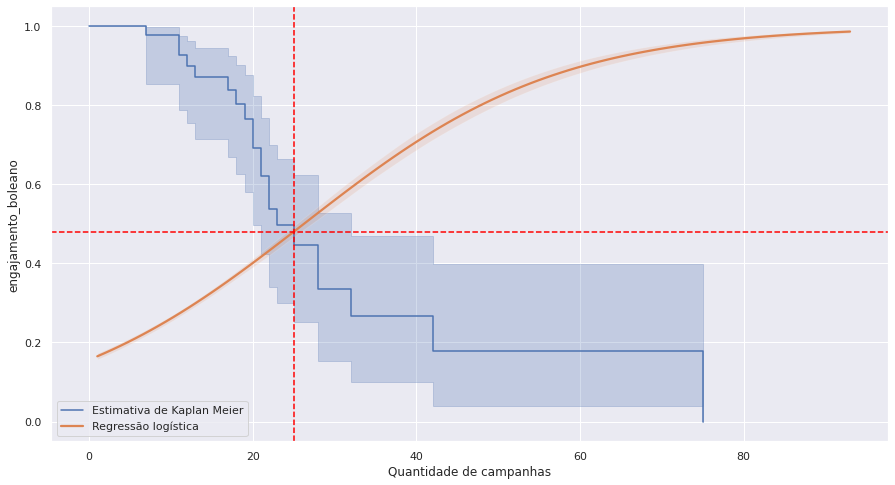

In [128]:
## criar uma variável 
km = KaplanMeierFitter() 

plt.figure(figsize=(15, 8))
## Treinar modelo
km.fit(T_9, E_9, label='Outros')

ax = km.plot(ci_show=True)

ax = sns.regplot(x="quantidade_campanhas_total", y="engajamento_boleano",
            data=df_portfolio_comunicados_geral_preprocessing_02,
            logistic=True, scatter=False)
ax.axvline(25, ls="--", c="red")
ax.axhline(0.48, ls="--", c="red")

ax = plt.xlabel("Quantidade de campanhas")
ax = plt.legend(labels=["Estimativa de Kaplan Meier", "Regressão logística"])


* Os clientes no segmento **Outros** têm uma probabilidade de **48%** de se tornarem engajados quando há **25 campanhas** totais e acumuladas.
* A quantidade de vezes ideal que o cliente deve ser acionado é de **25 campanhas**. Por quê?
  * Pelos dois modelos criados, regressão logística e kaplan meier, há um consenso de probabilidade de engajamento exatamente com 25 campanhas.

# Conclusão

A curva ideal de vezes que um cliente deve ser acionado é de 28 campanhas no total, porque, primeiramente, pelo modelo de regressão logística simples, relacionei a variável dependente engajamento e a variável independente quantidade de campanhas totais. Nesse modelo, houve significância estatística da variável independente e o intercepto, desde que o valor-p menor ou igual a 0.05 significa que a quantidade de campanhas e o intercepto são importantes para explicar a probabilidade de engajamento. O problema é que a regressão logística estabelece quanto mais quantidade de campanhas, maior é a probabilidade de engajamento, o que não é necessariamente verdade, principalmente porque as campanhas ocorrerão ao longo da jornada do cliente e quanto maior o tempo, maior a chance do cliente perder engajamento por fatores diversos, assim criei um modelo de sobrevivência para considerar a quantidade de campanhas acumuladas ao longo do tempo. Se o modelo de regressão logística estabelece uma curva de probabilidade completamente diferente do modelo de sobrevivência, como vou saber se a probabilidade de engajamento está correta? Criei uma sobreposição das curvas de engajamento de ambos os modelos e usei o cruzamento das curvas como a quantidade de campanhas ideal, porque é a probabilidade que os modelos concordam entre si, além disso a quantidade de campanhas totais é igual a quantidade de campanhas acumuladas ao longo do tempo. Dois segmentos tiveram a curva ideal muito diferente: Posto, 24; e Serviços recorrentes, 34.

# Salvar os datasets utilizados na análise.

In [129]:
df_portfolio_comunicados_geral_preprocessing.to_csv('df_portfolio_comunicados_geral_preprocessing.csv') 

df_portfolio_comunicados_geral_preprocessing_02.to_csv('df_portfolio_comunicados_geral_preprocessing_02.csv') 

df_engajamento_campanha_segmento_preprocessing_03.to_csv('df_engajamento_campanha_segmento_preprocessing_03.csv') 